In [ ]:
'''
Requirements:
1. Numpy
2. Matplotlib
3. Scikit-Learn
4. Scipy
5. math
'''


'\nRequirements:\n1. Numpy\n2. Matplotlib\n3. Scikit-Learn\n4. Scipy\n'

In [ ]:
''' Two Methods are used:
1. Wilson's Model
2. NRTL Model'''

" Two Methods are used:\n1. Wilson's Model\n2. NRTL Model"

In [ ]:
'''
Method 1: 
Wilson's Model
'''

"\nMethod 1: \nWilson's Model\n"

Normalized RMSE error in Pressure in dataset 1 at Temperature 323.15 K is 0.02079425799685652
Normalized RMSE error in Yi in dataset 1 at Temperature 323.15 K is 0.029346846186768943
Normalized RMSE error in Pressure in dataset 2 at Temperature 322.91 K is 0.02932086637030469
Normalized RMSE error in Yi in dataset 2 at Temperature 322.91 K is 0.028920926939169755
Normalized RMSE error in Pressure in dataset 3 at Temperature 328.15 K is 0.018488150050109328
Normalized RMSE error in Yi in dataset 3 at Temperature 328.15 K is 0.021095948002687284


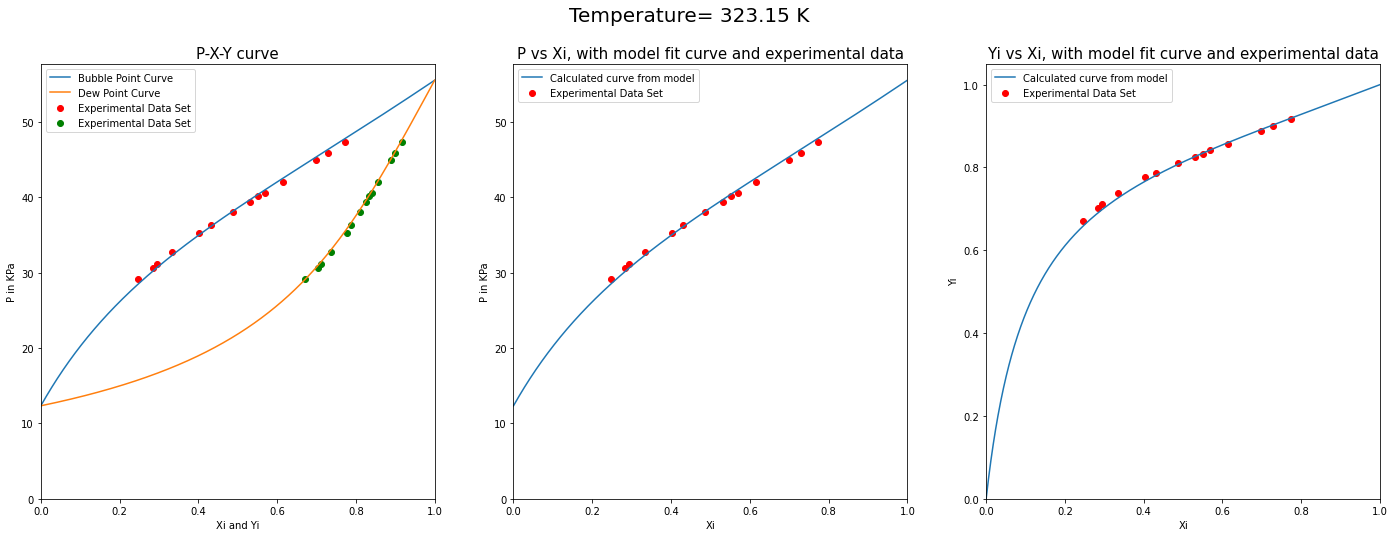

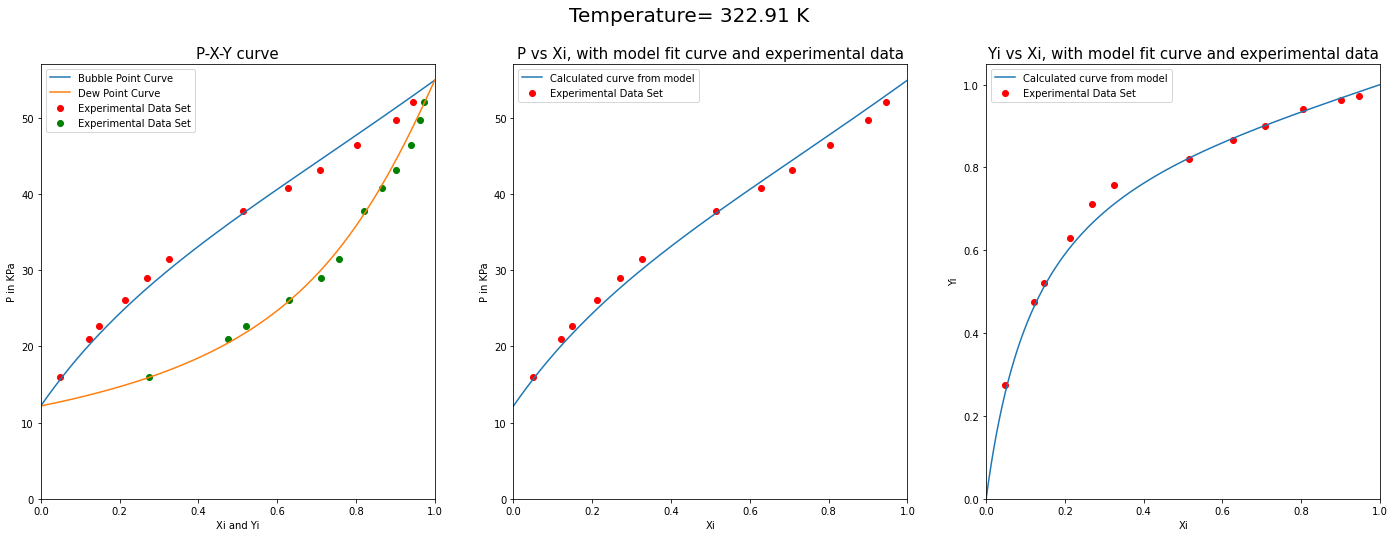

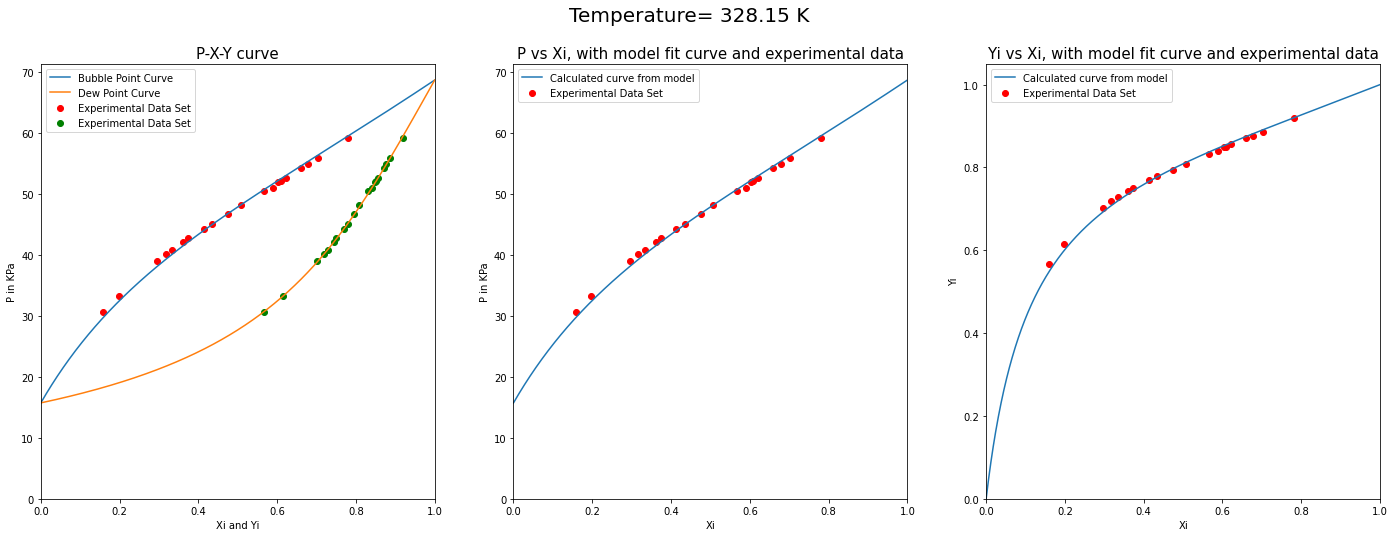

In [ ]:

import numpy as np
from matplotlib import pyplot as plt
from math import log,e,sqrt
from sklearn.metrics import mean_squared_error
from scipy.optimize import fmin,minimize

#1 is methanol, 2 is water

def Antoine_Saturated_Pressure(T):
      Ant1=5.20409
      B1=1581.341
      C1=-33.50 # These three variables are the coefficents of the Antoine Equation of State for methanol;
      Ant2=5.20389
      B2=1733.926
      C2=-39.485 #These three variables are the coefficients of the Antoine Equation of State for water
      P1sat=10**(Ant1-B1/(T+C1)) #Finding saturated pressure for methanol
      P2sat=10**(Ant2-B2/(T+C2)) #Finding saturated pressure for water
      return P1sat,P2sat

def Wilson_Param_determin(P1sat,P2sat,expxr,expyr,exppr):

  '''Consider the function J=x1*ln(gamma1)+x2*ln(gamma2)
     Our true function, will have the true gamma values from the experimental data.Lets call this function J_true
     Through Wilson's Model, we have an expression for gamma1 and gamma2. Subsituting that in the function equation, we get a new function. This is J_pred
     This is summation over all data poinnts, ((J_true) - (J-pred))^2
     This is called our objective function.
     We minimize this objective function, and get the paramaters of Wilson Activity Coefficient Model'''

  gamma1=[]
  gamma2=[]
  for i in range(len(expxr)):
    
    # using gamma1=y1*P/(x1*P1sat) and gamma2=y2*P/(x2*P2sat)
    gamma1.append(expyr[i]*exppr[i]/(expxr[i]*P1sat)) 
    gamma2.append((1-expyr[i])*exppr[i]/((1-expxr[i])*P2sat))

  gamma1=np.asarray(gamma1)
  gamma2=np.asarray(gamma2)
  # getting log of the gamma values
  gamma1=np.log(gamma1)
  gamma2=np.log(gamma2)

  def loss_function(_w):
    sum = 0
    for i in range(len(expxr)):
        # Get the true and predicted target values for example 'i'
        true_val = expxr[i]*gamma1[i]+(1-expxr[i])*gamma2[i] #True value
        calc_val = -expxr[i]*np.log((expxr[i]+(1-expxr[i])*_w[0]))-(1-expxr[i])*np.log(1-expxr[i]+expxr[i]*_w[1]) #predicted value
        sum = sum + (true_val-calc_val)**2
        return sum

  a=minimize(fun=loss_function,x0=[0.5,0.9])
  return a.x[0],a.x[1]

def Wilson_Raoult(x1,T,lambda1,lambda2,P1sat,P2sat):

      x2=1-x1 #liquid phase mole fraction of methanol

      #lambda1,lambda2=Wilson_Param_determin(x1,x2,P1sat,P2sat,expxr,expyr,exppr)
      Tau12=lambda1
      Tau21=lambda2
      gamma1=e**(-np.log(x1+x2*Tau12)+x2*(Tau12/(x1+x2*Tau12)-Tau21/(x2+x1*Tau21)))
      gamma2=e**(-np.log(x2+x1*Tau21)+x1*(Tau21/(x2+x1*Tau21)-Tau12/(x1+x2*Tau12)))

      #Using Modified Raoult's Law : y1*P i.e P1=x1*gamma1*P1sat and similarly for component 2
      P1=x1*gamma1*P1sat  #Pressure due to Water
      P2=x2*gamma2*P2sat  #Pressure due to Methanol

      P=P1+P2 #Total Pressure
      y1=P1/P #Gaseous Phase Mole fraction of Water
      return P,y1

def VLEcalc(Temp):
  count=0

  for T in Temp:
    Pr=[]
    xr=[]
    Yr=[]
    predPr=[]
    predXr=[]
    predYr=[]
    
    if(count==0): # at T= 323.15 k, observed data:  Source: Kurihara, Kiyofumi, Takeda, Kouichi, Kojima, Kazuo, and Minoura, Tsuyoshi. Isothermal vapor-liquid equilibria for methanol + ethanol + water, methanol + water, and ethanol + water. United States: N. p., 1995. Web. doi:10.1021/je00019a033.
      
      expxr=np.array([0.2470,0.2842,0.2940,0.3338,0.4028,0.4316,0.4872,0.5314,0.5513,0.5688,0.6145,0.6989,0.7290,0.7730])
      expyr=np.array([0.6710,0.7029,0.7109,0.7373,0.7772,0.7873,0.8100,0.8254,0.8326,0.8410,0.8569,0.8890,0.8991,0.9160])
      exppr=np.array([29.119,30.620,31.135,32.790,35.321,36.276,38.085,39.341,40.160,40.612,42.049,44.916,45.943,47.334])

    elif(count==1): # at T=322.91 K, observed data. Source: Bredig G.; Bayer R.: Die Dampfdrücke des binären Systems Methylalkohol-Wasser. Z.Phys.Chem.(Leipzig) 130 (1927) 1-14
      
      expxr=np.array([0.0486,0.1218,0.1478,0.2131,0.2693,0.3252,0.5143,0.6279,0.7083,0.8037,0.9007,0.9461])
      expyr=np.array([0.2741,0.4741,0.5220,0.6294,0.7106,0.7580,0.8203,0.8654,0.9007,0.9406,0.9627,0.9736])
      exppr=np.array([15.932,20.932,22.625,26.131,29.024,31.544,37.730,40.850,43.210,46.450,49.796,52.142])
    
    elif(count==2): # at T= 328.15 k, observed data:  Source: Kurihara, Kiyofumi, Takeda, Kouichi, Kojima, Kazuo, and Minoura, Tsuyoshi. Isothermal vapor-liquid equilibria for methanol + ethanol + water, methanol + water, and ethanol + water. United States: N. p., 1995. Web. doi:10.1021/je00019a033.
      
      expxr=np.array([0.1587,0.1980,0.2961,0.3171,0.3339,0.3610,0.3733,0.4137,0.4346,0.4753,0.5078,0.5669,0.5897,0.6030,0.6091,0.6217,0.6600,0.6781,0.7032,0.7808])
      expyr=np.array([0.5660,0.6154,0.7013,0.7182,0.7280,0.7432,0.7504,0.7693,0.7799,0.7947,0.8079,0.8315,0.8401,0.8495,0.8502,0.8557,0.8709,0.8770,0.8866,0.9183])
      exppr=np.array([30.710,33.368,39.038,40.215,40.835,42.143,42.760,44.237,45.184,46.743,48.181,50.500,51.100,51.974,52.227,52.664,54.245,54.956,55.980,59.208])

    #Now to Determine Wilson paramters from given test data
    P1sat,P2sat=Antoine_Saturated_Pressure(T)
    # Antoine Equation gives us Pressure in Bar, literature data is in KPa, as 1 bar=100 KPa, I multiply by 100
    P1sat=P1sat*100 
    P2sat=P2sat*100 
    lambda1,lambda2=Wilson_Param_determin(P1sat,P2sat,expxr,expyr,exppr) #Wilson parameters are lambda1 and lambda 2

    #x1 is liquid phase mole fraction of water
    for x1 in np.arange(0,1.001,0.001):
      P,y1=Wilson_Raoult(x1,T,lambda1,lambda2,P1sat,P2sat)
      Pr.append(P)
      xr.append(x1)
      Yr.append(y1)
    
    # Now, for our given dataset of x1 points, we find the values of Pressure and Yi based on our model
    for i in expxr:
      P,y1=Wilson_Raoult(i,T,lambda1,lambda2,P1sat,P2sat)
      predPr.append(P)
      predXr.append(i)
      predYr.append(y1)

    #Converting into numpy arrays
    Pr=np.asarray(Pr)
    xr=np.asarray(xr)
    Yr=np.asarray(Yr)

    predPr=np.asarray(predPr)
    predXr=np.asarray(predXr)
    predYr=np.asarray(predYr)

    '''Three graphs are plotted:
        First: Graph of P vs Xi(Bubble Point) and Yi vs P (Dew Point) based on our model
        Second: Graph of P vs Xi, calculated from our model. Experimental P and its corresponding Xi data points are scattered
        Second: Graph of Yi vs Xi, calculated from our model. Experimental Yi and its corresponding Xi data points are scattered'''

    fig,ax=plt.subplots(1,3,squeeze=False)
    fig.set_size_inches(24,8)

    ax[0,0].plot(xr,Pr,label='Bubble Point Curve')
    ax[0,0].plot(Yr,Pr,label='Dew Point Curve')
    ax[0,0].scatter(expxr,exppr,color='r',label='Experimental Data Set')
    ax[0,0].scatter(expyr,exppr,color='g',label='Experimental Data Set')
    ax[0,0].set_xlabel("Xi and Yi")
    ax[0,0].set_ylabel("P in KPa")
    ax[0,0].legend(loc="upper left")
    ax[0,0].set_title("P-X-Y curve",fontdict={'fontsize':15})
    
    ax[0,1].plot(xr,Pr,label='Calculated curve from model')
    ax[0,1].scatter(expxr,exppr,color='r',label='Experimental Data Set')
    ax[0,1].set_xlabel("Xi")
    ax[0,1].set_ylabel("P in KPa")
    ax[0,1].legend(loc="upper left")
    ax[0,1].set_title("P vs Xi, with model fit curve and experimental data",fontdict={'fontsize':15})
    
    ax[0,2].plot(xr,Yr,label='Calculated curve from model')
    ax[0,2].scatter(expxr,expyr,color='r',label='Experimental Data Set')
    ax[0,2].set_xlabel("Xi")
    ax[0,2].set_ylabel("Yi")
    ax[0,2].legend(loc="upper left")
    ax[0,2].set_title("Yi vs Xi, with model fit curve and experimental data",fontdict={'fontsize':15})
  
    plt.setp(ax,xlim=(0.0,1.0),ylim=(0.0))
    plt.suptitle(f'Temperature= {T} K',size=20)

    #RMSE for our model is calculated. This is by taking the values of P and Yi obtained experimentally and the values our model is predicting as the inputs
    rmsePr=mean_squared_error(exppr,predPr,squared=False)
    rmseYi=mean_squared_error(expyr,predYr,squared=False)# RMSE is calculated
    normrmsePr=rmsePr/(max(np.amax(predPr),np.amax(exppr))-min(np.amin(predPr),np.amin(exppr)))
    normrmseYi=rmseYi/(max(np.amax(predYr),np.amax(expyr))-min(np.amin(predYr),np.amin(expyr))) #RMSE is normalized

    print("Normalized RMSE error in Pressure in dataset",count+1,"at Temperature",T,"K is",normrmsePr)
    print("Normalized RMSE error in Yi in dataset",count+1,"at Temperature",T,"K is",normrmseYi)

    count+=1

VLEcalc([323.15,322.91,328.15])



In [ ]:
''' 
Method 2. 
Using NRTL Model
'''


' \nMethod 2. \nUsing NRTL Model\n'

Normalized RMSE error in Pressure in dataset 1 at Temperature 323.15 K is 0.01811890346510615
Normalized RMSE error in Yi in dataset 1 at Temperature 323.15 K is 0.030902361424346478
Normalized RMSE error in Pressure in dataset 2 at Temperature 322.91 K is 0.029839673118130895
Normalized RMSE error in Yi in dataset 2 at Temperature 322.91 K is 0.02538559295504591
Normalized RMSE error in Pressure in dataset 3 at Temperature 328.15 K is 0.013484544559142171
Normalized RMSE error in Yi in dataset 3 at Temperature 328.15 K is 0.016771635330004024


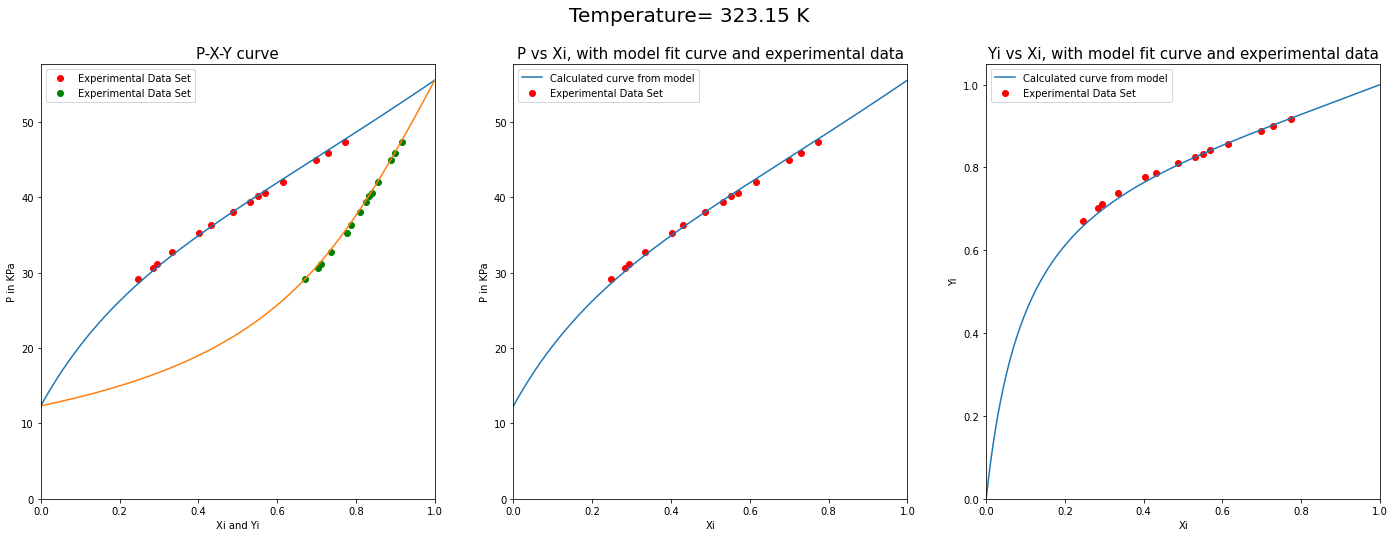

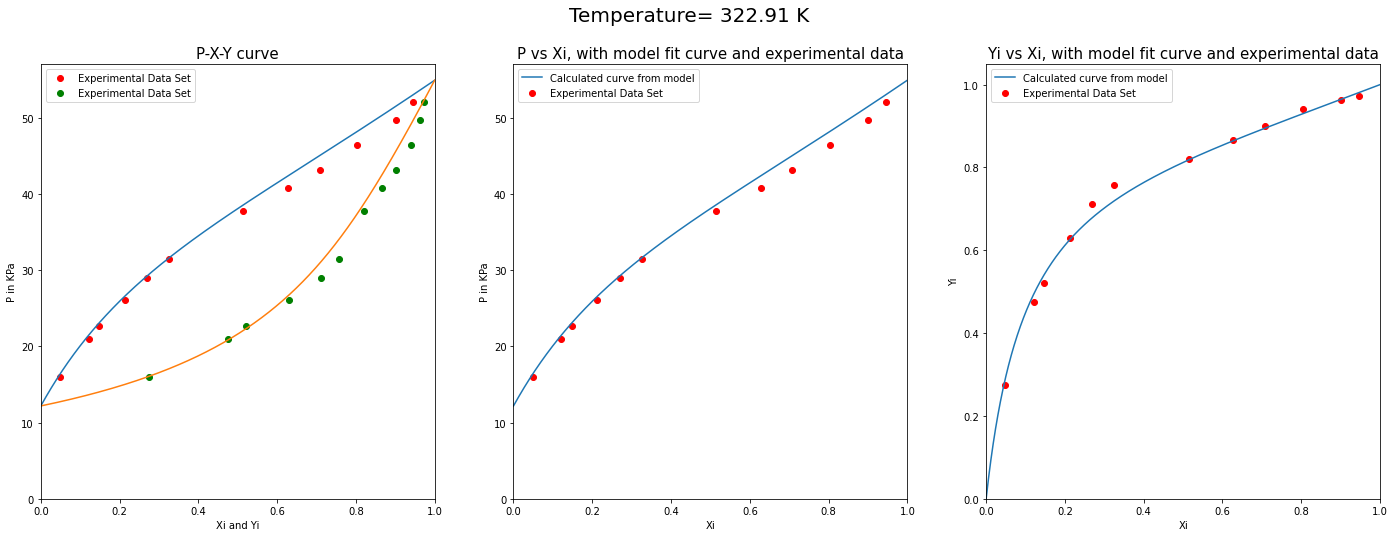

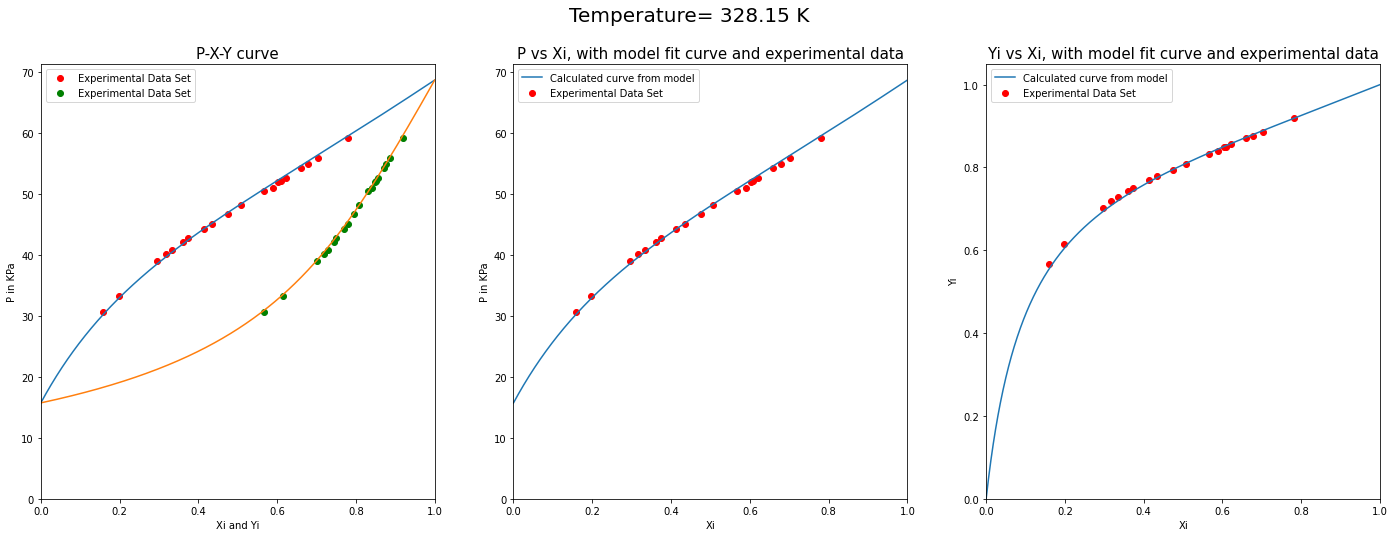

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from math import log,e,sqrt
from sklearn.metrics import mean_squared_error
#1 is methanol, 2 is water
def NRTL_Raoult(x1,T):
      x2=1-x1 #liquid phase mole fraction of water

      Ant1=5.20409
      B1=1581.341
      C1=-33.50 # These three variables are the coefficents of the Antoine Equation of State for methanol;
      Ant2=5.20389
      B2=1733.926
      C2=-39.485 #These three variables are the coefficients of the Antoine Equation of State for water
      P1sat=10**(Ant1-B1/(T+C1)) #Finding saturated pressure for methanol
      P2sat=10**(Ant2-B2/(T+C2)) #Finding saturated pressure for water
      
      # Using the NRTL activity coefficient Model
      alpha=0.3
      Tau21=2.732-617.3/T
      Tau12=-0.693+173/T #These data are obtained from Literature
      G12=e**(-1*alpha*Tau12)
      G21=e**(-1*alpha*Tau21)
      expr1=(Tau21*(G21/(x1+x2*G21))**2)+(G12*Tau12)/(x2+x1*G12)**2
      expr2=(Tau12*(G12/(x2+x1*G12))**2)+(G21*Tau21)/(x1+x2*G21)**2
      gamma1=e**(x2*x2*expr1) #Activity coefficient of Water
      gamma2=e**(x1*x1*expr2) #Activity coefficient of Methanol

      #Using Modified Raoult's Law : y1*P i.e P1=x1*gamma1*P1sat and similarly for component 2
      P1=x1*gamma1*P1sat  #Pressure due to Water
      P2=x2*gamma2*P2sat  #Pressure due to Methanol
      P=P1+P2 #Total Pressure
      y1=P1/P #Gaseous Phase Mole fraction of Water
      return P,y1
def VLEcalc(Temp):
  count=0
  for T in Temp:
    Pr=[]
    xr=[]
    Yr=[]
    predPr=[]
    predXr=[]
    predYr=[]
    #x1 is liquid phase mole fraction of methanol
    for x1 in np.arange(0,1.001,0.001):
      P,y1=NRTL_Raoult(x1,T)
      Pr.append(P)
      xr.append(x1)
      Yr.append(y1)
    if (count==0): # at T= 323.15 k, observed data:  Source: Kurihara, Kiyofumi, Takeda, Kouichi, Kojima, Kazuo, and Minoura, Tsuyoshi. Isothermal vapor-liquid equilibria for methanol + ethanol + water, methanol + water, and ethanol + water. United States: N. p., 1995. Web. doi:10.1021/je00019a033.

      expxr=np.array([0.2470,0.2842,0.2940,0.3338,0.4028,0.4316,0.4872,0.5314,0.5513,0.5688,0.6145,0.6989,0.7290,0.7730])
      expyr=np.array([0.6710,0.7029,0.7109,0.7373,0.7772,0.7873,0.8100,0.8254,0.8326,0.8410,0.8569,0.8890,0.8991,0.9160])
      exppr=np.array([29.119,30.620,31.135,32.790,35.321,36.276,38.085,39.341,40.160,40.612,42.049,44.916,45.943,47.334])

    elif (count==1): # at T=322.91 K, observed data. Source: Bredig G.; Bayer R.: Die Dampfdrücke des binären Systems Methylalkohol-Wasser. Z.Phys.Chem.(Leipzig) 130 (1927) 1-14
      
    
      expxr=np.array([0.0486,0.1218,0.1478,0.2131,0.2693,0.3252,0.5143,0.6279,0.7083,0.8037,0.9007,0.9461])
      expyr=np.array([0.2741,0.4741,0.5220,0.6294,0.7106,0.7580,0.8203,0.8654,0.9007,0.9406,0.9627,0.9736])
      exppr=np.array([15.932,20.932,22.625,26.131,29.024,31.544,37.730,40.850,43.210,46.450,49.796,52.142])
   
    elif(count==2): # at T= 328.15 k, observed data:  Source: Kurihara, Kiyofumi, Takeda, Kouichi, Kojima, Kazuo, and Minoura, Tsuyoshi. Isothermal vapor-liquid equilibria for methanol + ethanol + water, methanol + water, and ethanol + water. United States: N. p., 1995. Web. doi:10.1021/je00019a033.
      
      expxr=np.array([0.1587,0.1980,0.2961,0.3171,0.3339,0.3610,0.3733,0.4137,0.4346,0.4753,0.5078,0.5669,0.5897,0.6030,0.6091,0.6217,0.6600,0.6781,0.7032,0.7808])
      expyr=np.array([0.5660,0.6154,0.7013,0.7182,0.7280,0.7432,0.7504,0.7693,0.7799,0.7947,0.8079,0.8315,0.8401,0.8495,0.8502,0.8557,0.8709,0.8770,0.8866,0.9183])
      exppr=np.array([30.710,33.368,39.038,40.215,40.835,42.143,42.760,44.237,45.184,46.743,48.181,50.500,51.100,51.974,52.227,52.664,54.245,54.956,55.980,59.208])

    # Now, for our given dataset of x1 points, we find the values of Pressure and Yi based on our model
    for i in expxr:
      P,y1=NRTL_Raoult(i,T)
      predPr.append(P)
      predXr.append(i)
      predYr.append(y1)

    #Converting into numpy arrays
    Pr=np.asarray(Pr)
    Pr=Pr*100 # Antoine Equation gives us Pressure in Bar, literature data is in KPa, as 1 bar=100 KPa, I multiply by 100
    xr=np.asarray(xr)
    Yr=np.asarray(Yr)

    predPr=np.asarray(predPr)
    predPr=predPr*100 # Antoine Equation gives us Pressure in Bar, literature data is in KPa, as 1 bar=100 KPa, I multiply by 100
    predXr=np.asarray(predXr)
    predYr=np.asarray(predYr)
    
    '''Three graphs are plotted:
        First: Graph of P vs Xi(Bubble Point) and P vs Yi (Dew Point) based on our model
        Second: Graph of P vs Xi, calculated from our model. Experimental P and its corresponding Xi data points are scattered
        Second: Graph of Yi vs Xi, calculated from our model. Experimental Yi and its corresponding Xi data points are scattered'''
    fig,ax=plt.subplots(1,3,squeeze=False)
    fig.set_size_inches(24,8)

    ax[0,0].plot(xr,Pr)#,label='Bubble Point Curve')
    ax[0,0].plot(Yr,Pr)#,label='Dew Point Curve')
    ax[0,0].scatter(expxr,exppr,color='r',label='Experimental Data Set')
    ax[0,0].scatter(expyr,exppr,color='g',label='Experimental Data Set')
    ax[0,0].set_xlabel("Xi and Yi")
    ax[0,0].set_ylabel("P in KPa")
    ax[0,0].legend(loc="upper left")
    ax[0,0].set_title("P-X-Y curve",fontdict={'fontsize':15})

    ax[0,1].plot(xr,Pr,label='Calculated curve from model')
    ax[0,1].scatter(expxr,exppr,color='r',label='Experimental Data Set')
    ax[0,1].set_xlabel("Xi")
    ax[0,1].set_ylabel("P in KPa")
    ax[0,1].legend(loc="upper left")
    ax[0,1].set_title("P vs Xi, with model fit curve and experimental data",fontdict={'fontsize':15})

    ax[0,2].plot(xr,Yr,label='Calculated curve from model')
    ax[0,2].scatter(expxr,expyr,color='r',label='Experimental Data Set')
    ax[0,2].set_xlabel("Xi")
    ax[0,2].set_ylabel("Yi")
    ax[0,2].legend(loc="upper left")
    ax[0,2].set_title("Yi vs Xi, with model fit curve and experimental data",fontdict={'fontsize':15})

    plt.setp(ax,xlim=(0.0,1.0),ylim=(0.0))
    plt.suptitle(f'Temperature= {T} K',size=20)

    #RMSE for our model is calculated. This is by taking the values of P and Yi obtained experimentally and the values our model is predicting as the inputs
    rmsePr=mean_squared_error(exppr,predPr,squared=False)
    rmseYi=mean_squared_error(expyr,predYr,squared=False)# RMSE is calculated
    normrmsePr=rmsePr/(max(np.amax(predPr),np.amax(exppr))-min(np.amin(predPr),np.amin(exppr)))
    normrmseYi=rmseYi/(max(np.amax(predYr),np.amax(expyr))-min(np.amin(predYr),np.amin(expyr))) #RMSE is normalized

    print("Normalized RMSE error in Pressure in dataset",count+1,"at Temperature",T,"K is",normrmsePr)
    print("Normalized RMSE error in Yi in dataset",count+1,"at Temperature",T,"K is",normrmseYi)

    count+=1

VLEcalc([323.15,322.91,328.15])
